Taylor Maurer
10/8/2020
Python Assignment 2

I'll be using the suggested data set.

In [50]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [51]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [52]:
#import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

In [53]:
#load data
#using suggested missing_value_formats
missing_value_formats = ["n.a.","?","NA","n/a", "na", "--", " "]
columnNames = ["breaking length", "elastic modulus", "stress at failure",
               "burst strength", "arithmetic fiber length", "long fiber fraction"
               "fine fiber fraction", "zero span tensile"]
df_raw = pd.read_csv('pulp-paper-properties.csv')
df_raw.shape
df_raw.head(5)
df_raw.tail(5)



(62, 8)

,BL,EM,SF,BS,AFL,LFF,FFF,ZST
0,21.312,7.039,5.326,0.932,-0.030,35.239,36.991,1.057
1,21.206,6.979,5.237,0.871,0.015,35.713,36.851,1.064
2,20.709,6.779,5.060,0.742,0.025,39.220,30.586,1.053
3,19.542,6.601,4.479,0.513,0.030,39.756,21.072,1.050
4,20.449,6.795,4.912,0.577,-0.070,32.991,36.570,1.049


,BL,EM,SF,BS,AFL,LFF,FFF,ZST
57,16.441,6.315,2.997,-0.400,-0.605,2.845,84.554,1.008
58,16.294,6.572,3.017,-0.478,-0.694,1.515,81.988,0.998
59,20.289,7.719,4.866,0.239,-0.559,2.054,8.786,1.081
60,17.163,7.086,3.396,-0.236,-0.415,3.018,5.855,1.033
61,20.289,7.437,4.859,0.470,-0.324,17.639,28.934,1.070


As in the example, let's look at the data to find out if there's any strange things goin on with it:

In [54]:
df_raw.describe()

,BL,EM,SF,BS,AFL,LFF,FFF,ZST
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,21.722823,7.266194,5.637468,1.018790,-0.021758,39.032677,26.677694,1.066806
std,2.881470,0.716491,1.462890,0.693017,0.249537,14.867804,17.561318,0.029492
min,16.294000,5.948000,2.997000,-0.478000,-0.694000,1.515000,-0.391000,0.998000
25%,19.328750,6.579250,4.364000,0.460250,-0.154000,31.912500,17.987000,1.044250
50%,21.259000,7.386500,5.357000,0.926000,0.000000,41.925500,27.085000,1.066000
75%,24.525000,7.913000,7.101750,1.702500,0.131000,49.025000,33.775000,1.087750
max,26.194000,8.454000,7.816000,2.145000,0.558000,63.035000,84.554000,1.129000


Right off the bat, we can see there are large variations of this data. The means do not align well and there are some (LFF and FFF) that have very large variations. This points to us most likely utilziing the correlation matrix instead of the covariance matrix.  

In [55]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BL      62 non-null     float64
 1   EM      62 non-null     float64
 2   SF      62 non-null     float64
 3   BS      62 non-null     float64
 4   AFL     62 non-null     float64
 5   LFF     62 non-null     float64
 6   FFF     62 non-null     float64
 7   ZST     62 non-null     float64
dtypes: float64(8)
memory usage: 4.0 KB


During the example I thought the matrix scatter plots were more helpful than the series of box plots when trying to figure out the data variability. So I will be going straight to doing that.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E9ACEA5DC8>,
      dtype=object)

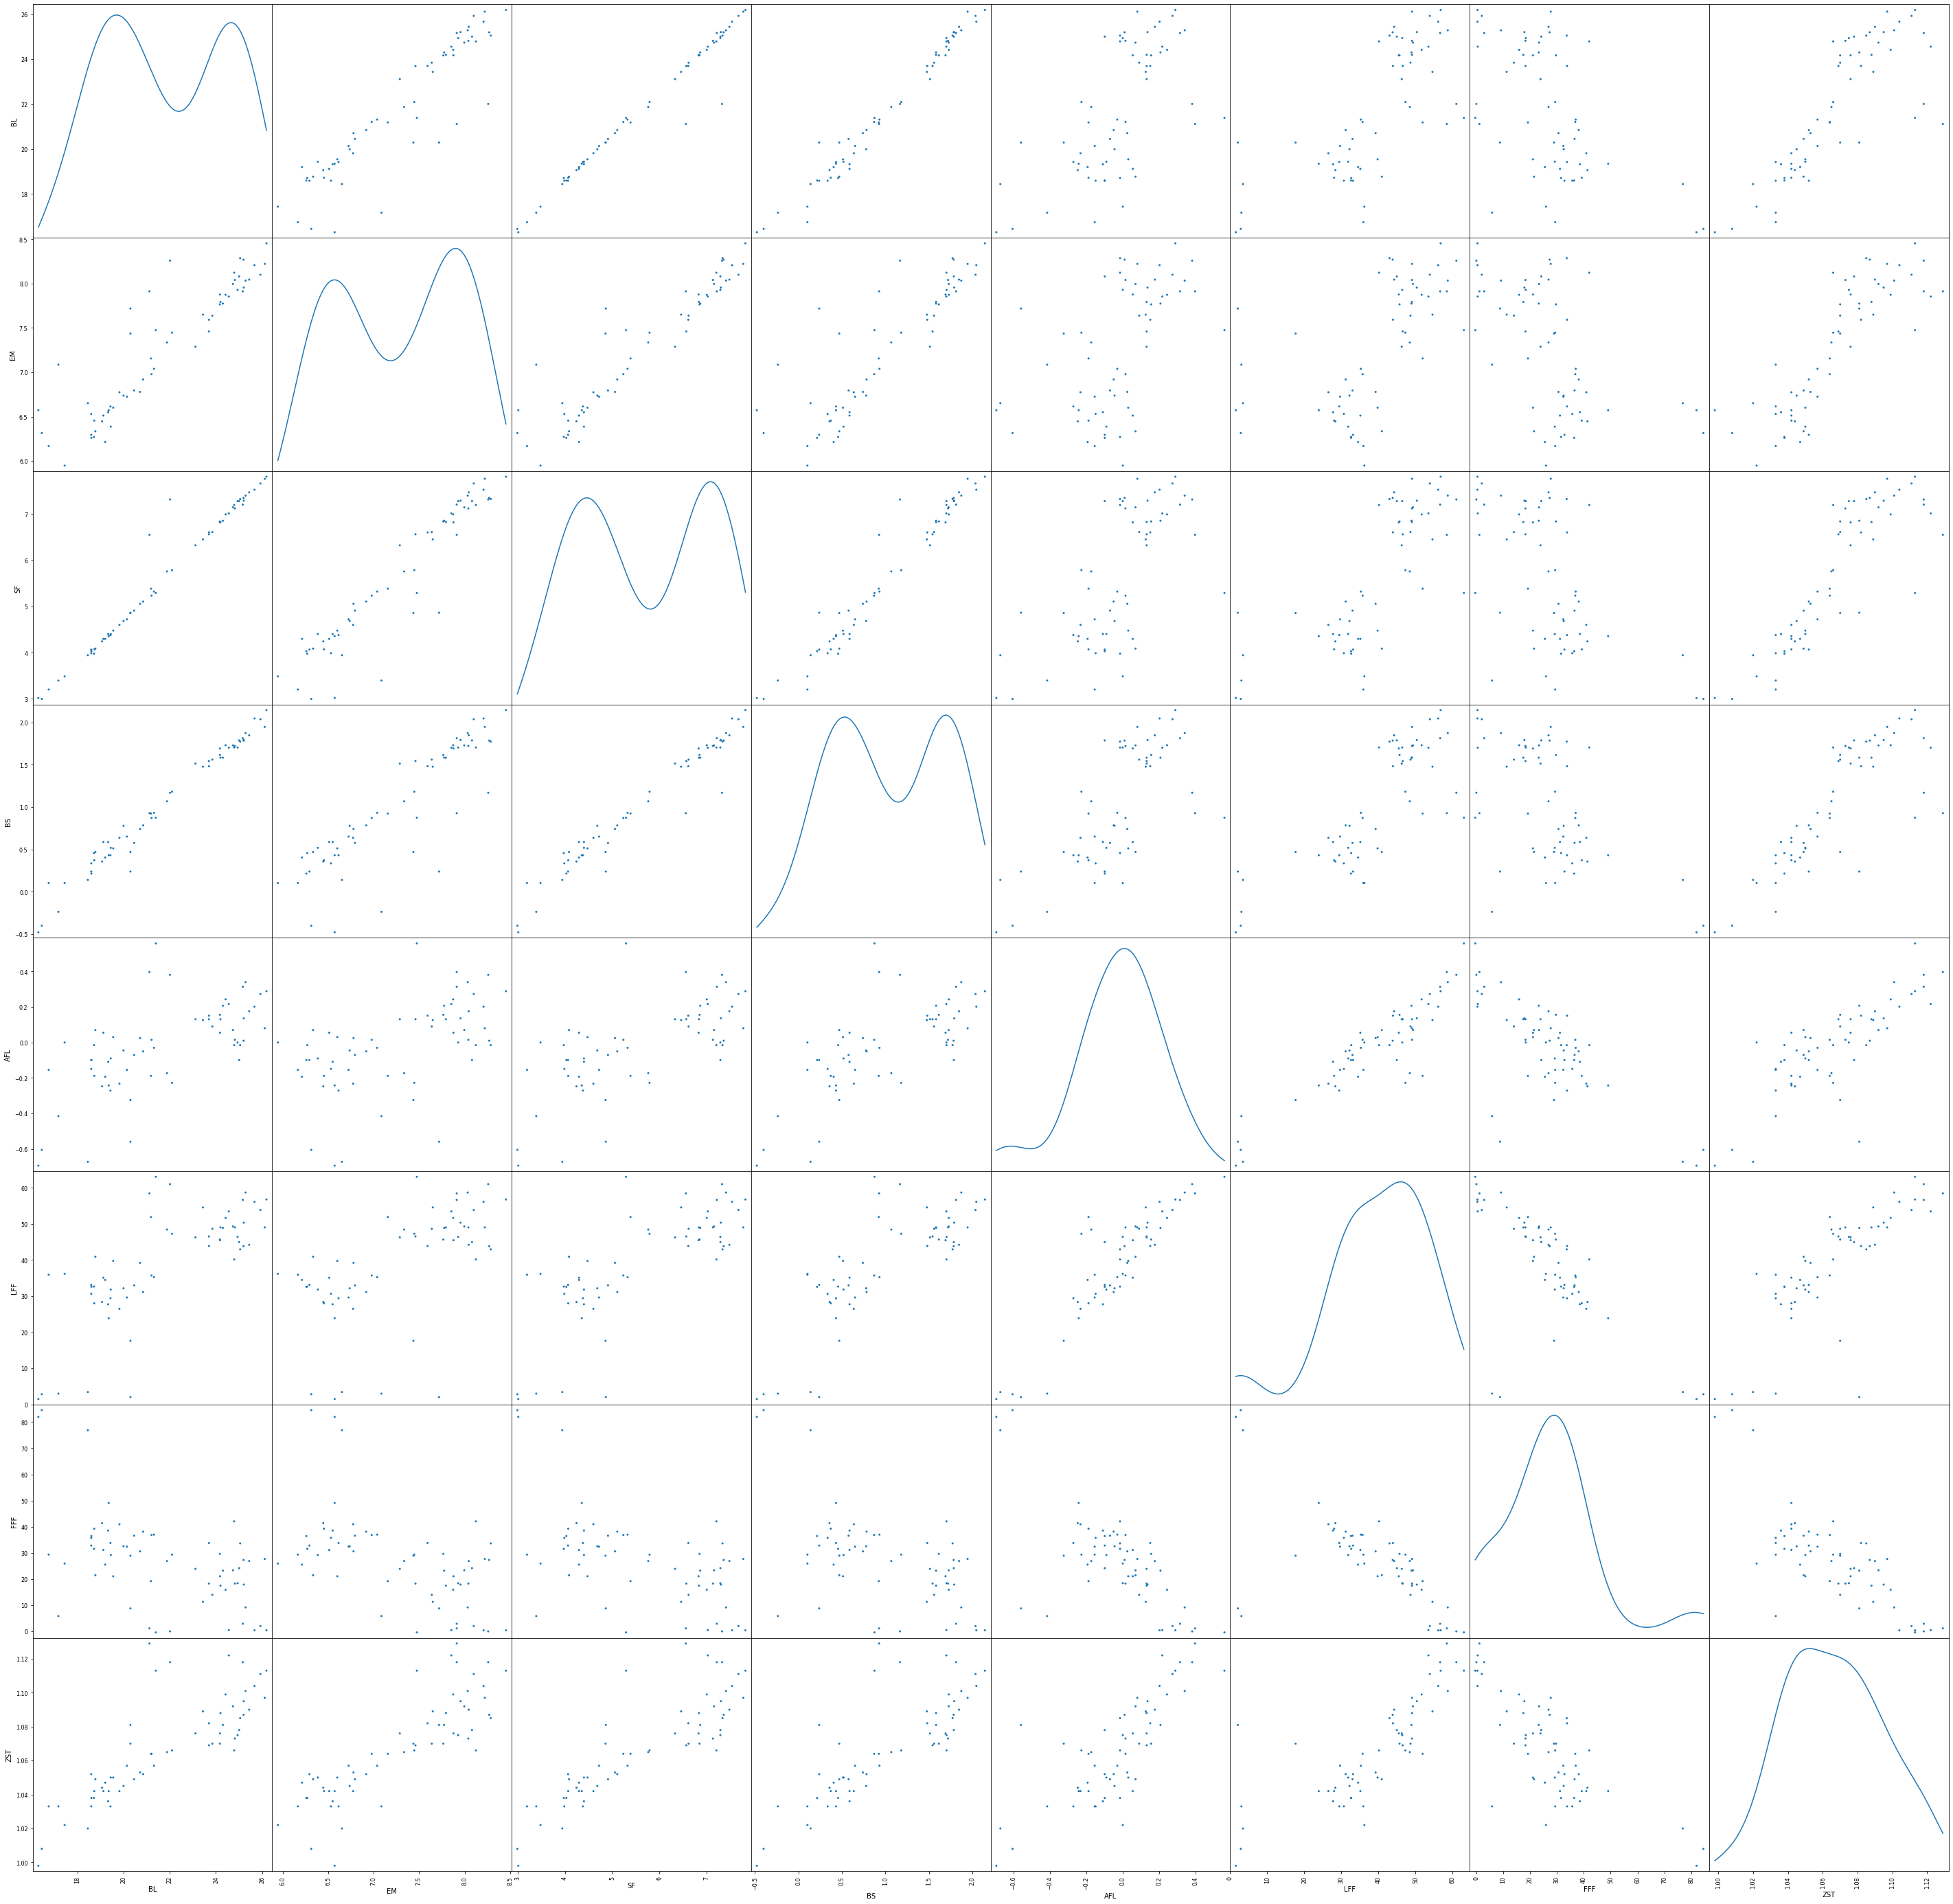

In [56]:
scatter_matrix(df_raw, alpha=1, figsize = (50,50), diagonal='kde')

It looks like there is some correlation within the data. There is strong positive correlation within the top left variables (so the paper properties with themselves) and then there is weaker correlation between the characterisitics and the properties.

Text(0.5, 1.0, 'Scree Plot (w/covariance matrix)')

Text(0.5, 0, 'Principal Component ID')

Text(0, 0.5, 'Proportion of Variability')

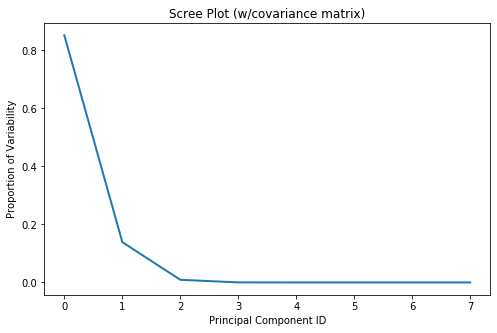

In [57]:
#now moving onto covariances:
df_cov = df_raw.cov()
lamb, e = np.linalg.eig(df_cov)
totalVariance = lamb.sum()
PVE = lamb/totalVariance
fig = plt.figure(figsize=(8,5))
plt.plot(PVE, linewidth=2)
plt.title('Scree Plot (w/covariance matrix)')
plt.xlabel('Principal Component ID')
plt.ylabel('Proportion of Variability')
plt.show()


In [58]:
print(e)

[[ 9.08743717e-02 -1.08444817e-01  8.53868688e-01 -4.03884159e-01
   2.07025580e-01 -6.63067126e-02 -2.01171847e-01 -6.41380512e-03]
 [ 2.10438844e-02 -1.14164784e-02  2.22550561e-01  7.23557331e-01
   5.80486479e-01 -2.35900900e-01  1.83187323e-01 -1.38373965e-02]
 [ 4.84052519e-02 -5.44904513e-02  4.03207193e-01  5.33244136e-01
  -6.89719433e-01  2.49080614e-01 -9.94776709e-02 -1.06074587e-02]
 [ 2.31451291e-02 -3.02681764e-02  1.78341274e-01 -1.67776805e-01
  -1.50330849e-01  2.66823881e-02  9.55631546e-01  4.52825387e-02]
 [ 1.00706398e-02 -8.36266325e-03 -5.71217582e-03 -1.73066189e-02
  -3.48574548e-01 -9.35953827e-01 -2.96067180e-02 -3.32590069e-02]
 [ 6.19178629e-01 -7.67594058e-01 -1.64055766e-01  9.03494403e-03
   1.85552448e-02  7.59289697e-03 -4.38609150e-03 -2.77298950e-04]
 [-7.77775849e-01 -6.28453147e-01  5.51720057e-03  7.58046473e-03
   2.75010684e-03 -3.95869588e-03 -2.43148858e-04  4.17100524e-04]
 [ 1.17253230e-03 -2.90271081e-04  4.52748541e-03  2.01344697e-02
  -

It does not look like there are large variations wtihin any one eigenvector contributing to an increase of the principal component contribution. However, let's still examine if using the correlation matrix helps in anyway.

Text(0.5, 1.0, 'Scree Plot (w/covariance matrix)')

Text(0.5, 0, 'Principal Component ID')

Text(0, 0.5, 'Proportion of Variability')

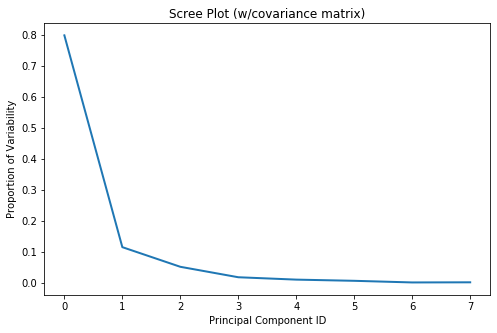

In [59]:
df_corr = df_raw.corr()
newLamb, newE = np.linalg.eig(df_corr)
totalVariance = newLamb.sum()
PVE = newLamb/totalVariance
fig = plt.figure(figsize=(8,5))
plt.plot(PVE, linewidth=2)
plt.title('Scree Plot (w/covariance matrix)')
plt.xlabel('Principal Component ID')
plt.ylabel('Proportion of Variability')
plt.show()

In [60]:
print(newE)

[[ 3.70521438e-01 -3.28890674e-01  1.04647882e-01  2.54885548e-01
   1.92584506e-01  2.71862468e-01  7.31953319e-01 -1.78530985e-01]
 [ 3.50856050e-01 -3.82874448e-01 -3.37654484e-01 -2.50806679e-01
  -8.46379297e-02 -6.74572032e-01 -1.47770174e-02 -3.01601196e-01]
 [ 3.78670320e-01 -2.86474196e-01  5.00622005e-02  1.78578357e-02
   7.45682481e-04 -5.93935316e-02 -9.95251059e-02  8.70794352e-01]
 [ 3.74693661e-01 -2.44913577e-01  2.32775726e-01  3.54221521e-01
   1.61859071e-01  2.24980374e-01 -6.61666350e-01 -3.24573090e-01]
 [ 3.29152405e-01  4.70008401e-01  3.73439108e-01 -3.50187850e-01
   5.98442643e-01 -2.21656000e-01  3.44609127e-02 -1.44902281e-02]
 [ 3.48085176e-01  3.32960601e-01  4.40781134e-01  1.21994550e-01
  -7.21371967e-01 -1.55014242e-01  9.86086735e-02 -6.83569277e-02]
 [-2.97511981e-01 -5.13274923e-01  6.17966485e-01 -5.00799931e-01
  -9.36236780e-02  5.27971121e-02 -3.96715643e-03 -6.15114631e-02]
 [ 3.71226847e-01  8.92532927e-02 -3.20499852e-01 -5.98350071e-01
  -

It seems like using the correlation matrix really didn't add anything as both the scree plot and the eigenvectors indicate the same thing that using the covariance matirx did; that the utilizing the first 5 PCAs will give us enough information to explain the data variation.  I've picked 5 as from the scree plot the first 5 (0 to 4) components give us 98% of the variation. 

So the eigen vectors essentially tell you the size of the principal component. To get an understanding of what composes the PCs we can look at the corresponding eigenvectors. 

In [61]:
eigendf = pd.DataFrame(e, columns =  [ 'breaking_length', 'elastic_modulus', 'stress_at_failure',
               'burst_strength', 'arithmetic_fiber_length', 'long_fiber_fraction',
               'fine_fiber_fraction', 'zero_span_tensile'])
eigendf

,breaking_length,elastic_modulus,stress_at_failure,burst_strength,arithmetic_fiber_length,long_fiber_fraction,fine_fiber_fraction,zero_span_tensile
0,0.090874,-0.108445,0.853869,-0.403884,0.207026,-0.066307,-0.201172,-0.006414
1,0.021044,-0.011416,0.222551,0.723557,0.580486,-0.235901,0.183187,-0.013837
2,0.048405,-0.054490,0.403207,0.533244,-0.689719,0.249081,-0.099478,-0.010607
3,0.023145,-0.030268,0.178341,-0.167777,-0.150331,0.026682,0.955632,0.045283
4,0.010071,-0.008363,-0.005712,-0.017307,-0.348575,-0.935954,-0.029607,-0.033259
5,0.619179,-0.767594,-0.164056,0.009035,0.018555,0.007593,-0.004386,-0.000277
6,-0.777776,-0.628453,0.005517,0.007580,0.002750,-0.003959,-0.000243,0.000417
7,0.001173,-0.000290,0.004527,0.020134,-0.002743,-0.033439,-0.044147,0.998247


Of the items that make up the PCA, the largest contributors are (while looking at PCA 0 and 1) stress at failure, burst strength, and arithmetic fiber length. They account for most of the variability of the data set. So you're prinicpal components that you'd take forward would be likely utilizing at least those items to capture the data set variability. 

Looking closer at P0, we can see that it's largely a balance between a positive stress at failure piece and a negative burst strength. In fact most of the negative terms within P0 give an estimation of the strength of the paper (elastic modulus, burst strength, etc.). Thus P0 gives an idea of how applied stress/pressure is met by the strength of the paper. 